Final Project Group 50

**Introduction**

In this project, we will be determining the best neighborhood in pittsburgh... for rats. This means that many things such as run down properties or health code violations, will be positive things to look for in our ideal neighborhood. Right from the start we decided to go with this metric, as it provides a unique and fun take on what is considered the "best neighborhood", we didn't even consider anything else. 

**The Metric**

Now, what qualifies a neighborhood to be more rat friendly than the others? We decided on 3 things: The amount/quality of condemned or dead-end properties in the area, the amount of pest code violations, and the amount of dog licenses in each neighborhood. Here are the links to the datasets that we are using:

- Condemned/Dead-end Properties: https://data.wprdc.org/dataset/condemned-properties/resource/0a963f26-eb4b-4325-bbbc-3ddf6a871410

- Health Code Violations: https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations/resource/1a1329e2-418c-4bd3-af2c-cc334e7559af

- Dog Licenses in Area: https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/ecedb5a4-4e9d-469b-8cde-2673ee48c482

We chose these metrics because they represent 3 very important aspects of life for a rat. First, rats need shelter to live in and be safe. An area with many trashy properties would provide plenty of shelter for the rats to live in. Second, rats need to be able to eat food and thrive. Therefore, analyzing the amount of pest related health code violations in the local restaurants will show us where rats can live to easily grab a bite to eat. Lastly, rats need to live safely. That's why we will also be taking the amount of dog licenses into account, so we can find the best neighborhood where rats won't have to worry about being snatched up or eaten when they let their guard down. Overall, our approach to find the best possible neighborhood for rats will be whichever neighborhood has the highest average ranking between our 3 important sub-metrics. Let's begin!



**Submetric 1: Shelter**

In order to figure out which neighborhood has the best places to live for rats, we will need to find a ratio between the amount of condemned/dead-end properties and the total inspection scores which rate the severity of the property's health violation.

To do that, we will find the average inspection score of the condemned properties in each neighborhood, but there is one thing we will need to take into account. Specifically, if we are going to use the average, we need to make sure that neighborhoods with few properties in general are removed from our list. This is because we can't decide that a neighborhood is the best just because it has 5 really bad properties in the whole area. The rats need places to live, and for that reason, any neighborhoods with less than 75 condemned properties are not eligible to be considered the best.

In [4]:
import pandas as pd
data = pd.read_csv('Condemned.tsv', delimiter='\t')
data['Zip Code'] = data['address'].str.extract(r'(\d{5})$')

total_scores = data.groupby('Zip Code')['latest_inspection_score'].sum()
property_count = data.groupby('Zip Code').size().sort_values(ascending=False)

zip_analysis = pd.DataFrame({
    'Total Score': total_scores,
    'Property Count': property_count
})

min_properties = 75
zip_analysis = zip_analysis[zip_analysis['Property Count'] >= min_properties]

zip_analysis['Average Score'] = zip_analysis['Total Score'] / zip_analysis['Property Count']

worst_zip = zip_analysis.sort_values(by='Average Score', ascending=False)
print(worst_zip)

          Total Score  Property Count  Average Score
Zip Code                                            
15210           866.0             537       1.612663
15219           437.0             283       1.544170
15224           124.0              82       1.512195
15214           291.0             204       1.426471
15212           555.0             411       1.350365
15208           372.0             291       1.278351
15206           303.0             250       1.212000
15207           224.0             199       1.125628
15221            90.0              80       1.125000
15220            85.0              83       1.024096
15204           131.0             134       0.977612


And here we have it. The top 11 neighborhoods with the best shelter for rats are as follows:

1. St. Clair 
2. Central Business District
3. Bloomfield
4. Perry North
5. Perry South
6. North Point Breeze
7. Larimer
8. Hazelwood
9. Wilkinsburgh
10. Elliot
11. Sheraden

The reason that we used the average inspection score as our submetric over other important metrics such as the total properties or the total inspection scores, is because a rat does not  have realtors telling them which available home is the best for them to live in. Therefore, under the assumption that a rat may choose a random condemned or dead-end property to live in, the most rat friendly neighborhood would be the one with the highest average inspection scores.

To conclude, the neighborhood with the best shelter options for a rat to live in, is St. Clair (15210). They have the highest average inspection score of 1.6, and they also have the most places to live in general, with 537 condemned or dead-end properties.

**Submetric 2: Places to eat (you can change this label if u want just make sure it makes sense with the intro)**
To find out which neighborhood has the best eats for rats were gonna have to take a look into which neighborhood has the most food facilites with pest related health code violations. 

To do this we will have to filter data from all the food facilites in the greater pittsburgh area. Thankfully there is a data base containing every health code violation for every food faciliy in the greater pittsburgh area. This will make the process easy for us, all we have to do is filter the data by pest related violations in the year 2024 then group by zip code. From their we can determine which zip code has the most facilities with pest related violations.

In [2]:
import pandas as pd
data = pd.read_csv("rats.csv")

#convert date column to datetime format to make ease
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])

#filter for pest management in 2024
filtered_data = data[(data['description_new'].str.contains('pest management', case=False, na=False)) & (data['inspect_dt'].dt.year == 2024)]

#group filtered data by zip code
zip_counts = filtered_data.groupby('zip')['facility_name'].nunique()

#find zip code with the highest count
max_zip_count = zip_counts.idxmax()
max_facility_count = zip_counts[max_zip_count]

print(f"The zip code with the most facilities with pest violations is {max_zip_count} with {max_facility_count} facilities.")

The zip code with the most facilities with pest violations is 15213.0 with 23 facilities.


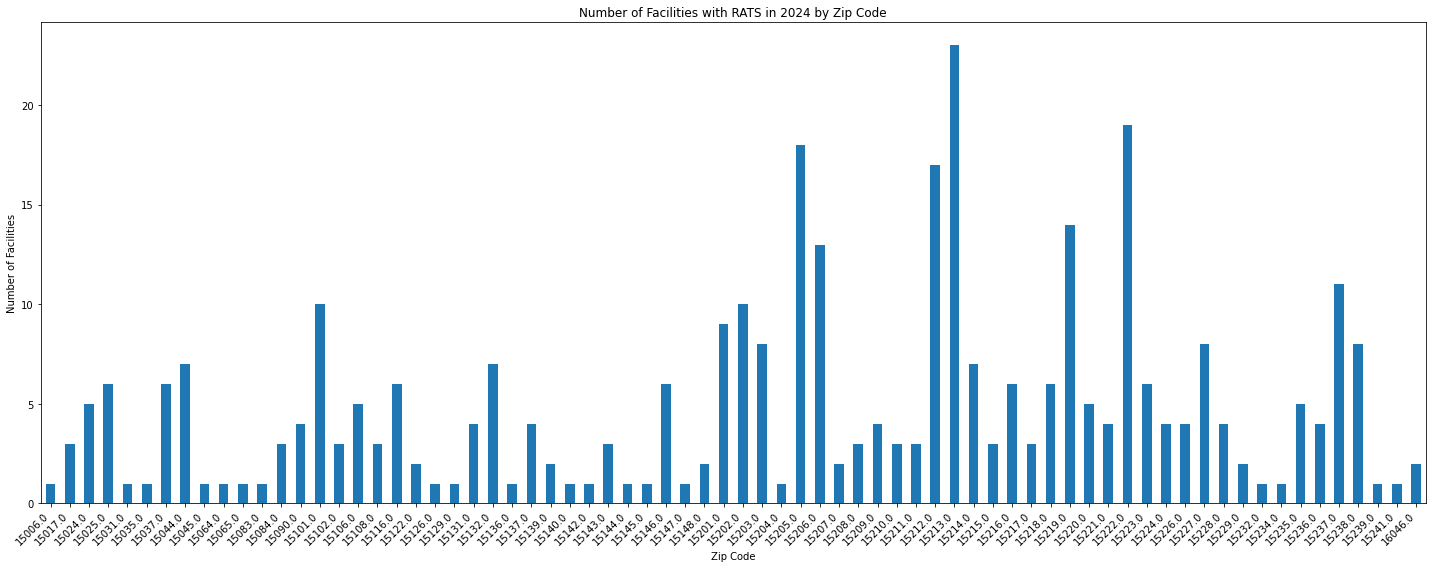

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("rats.csv")

#convert date column to datetime format to make easier
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])

#filter data by pest managment in 2024
filtered_data = data[(data['description_new'].str.contains('pest management', case=False, na=False)) & (data['inspect_dt'].dt.year == 2024)]

#group filtered by zip
zip_counts = filtered_data.groupby('zip')['facility_name'].nunique()

#plot
plt.figure(figsize=(20, 8))
zip_counts.plot(kind='bar')
plt.title('Number of Facilities with RATS in 2024 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In conclusion we found that the neighbor hood with the most rats is oakland(15213) with 23 facilites with pest realted violations.